# EDA (`E`xploratory `D`ata `A`nalysis) 
- The reasoning behind this approach was to examine the data before building a model
- Today almost every Data scientists and analysts spend most of their time in `Data Wrangling` and `Exploratory Data Analysis also known as EDA`

# What is Exploratory Data Analysis?

Exploratory Data Analysis or EDA technique is used for getting insights from the data. Data Scientists and Analysts try to find `different patterns`, `relations`, and `anomalies in the data` using some statistical graphs and other visualization techniques. Following things are part of EDA :

- Get maximum insights from a data set
- Uncover underlying structure
- Extract important variables from the dataset
- Detect outliers and anomalies(if any)
- Test underlying assumptions
- Determine the optimal factor settings


# Why EDA is important?
- The main purpose of EDA is to 
- Detect any errors, 
- Outliers as well as 
- To understand different patterns in the data. 
- It allows Analysts to understand the data better before making any assumptions. 
- The outcomes of EDA helps businesses to know their customers, expand their business and take decisions accordingly.

# How to perform EDA?

- Following steps are most commonly used to perform EDA:
    

## Import libraries and load dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

## Read Data set and see top and bottom rows to have quick glimpse of data

In [7]:
# df = pd.read_csv("Disaster_tweets.csv")

In [5]:
df = pd.read_csv("Disaster_tweets.csv",index_col="id")

In [6]:
df.head(5)

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [8]:
df.tail(5)

,keyword,location,text,target
id,,,,
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


## Get shape of data to understand number of observations

In [9]:
df.shape

(11370, 4)

## Get Feature names of dataset

In [10]:
df.keys()

Index(['keyword', 'location', 'text', 'target'], dtype='object')

In [11]:
df.columns

Index(['keyword', 'location', 'text', 'target'], dtype='object')

## Get full Decription/summary of dataset

In [12]:
df.describe()

,target
count,11370.000000
mean,0.185928
std,0.389066
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
df.describe(include="all")

,keyword,location,text,target
count,11370,7952,11370,11370.000000
unique,219,4504,11223,NaN
top,thunderstorm,United States,I want to help you with my project to save the...,NaN
freq,93,96,3,NaN
mean,NaN,NaN,NaN,0.185928
std,NaN,NaN,NaN,0.389066
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


## Get full info about all variables/features of dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 444.1+ KB


## Understand the data types of Dataset and downgrade its type to save memory

In [15]:
# Home work

## See if any missing values are present in data set

In [16]:
df.isnull()

,keyword,location,text,target
id,,,,
0,False,True,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
11365,False,False,False,False
11366,False,False,False,False
11367,False,False,False,False


In [17]:
df.isnull().sum()

keyword        0
location    3418
text           0
target         0
dtype: int64

## Visualize missing values of data set

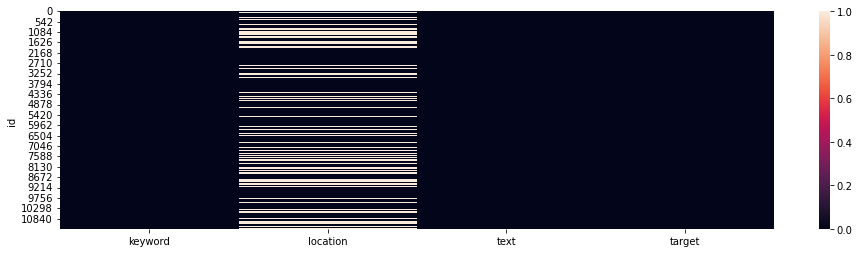

In [18]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

## Get unique values for each feature, this will help you to get to know if any unwanted characters are present in dataset

In [20]:
for k in df.keys():
    print(k,df[k].unique()[:5])

keyword ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance']
location [nan 'New York City' 'Morgantown, WV' 'OC' 'London, England']
text ['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'
 'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…'
 'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI'
 'Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9'
 '"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8']
target [1 0]


## Decide if features needs to be dropped
- Some important factors which helps to drop feature(s):
     - If more than 10% values are empty in a given feature, drop them until it really contributes to EDA
     - Some features like person name, ID, pin code, SSN etc. doesnt add much value because they are unique
     - There could be 2 features which is similar in nature, choose one of them

In [21]:
# NA

## Fill missing values
- Some important factors which helps to fill empty data
    - if feature has `categorical data` then replace empty value using `mode()`
    - if feature has `discrete data` and range is very less (1-10), go with `mode()`,because they will be categorical data else go with `median()`
    - if feature has `continous data` then go with `median()`

In [23]:
df.location.isnull().sum()

3418

In [24]:
df.location.unique()

array([nan, 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

In [25]:
df.location.value_counts()

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64

In [26]:
df.location.mode()

0    United States
dtype: object

In [29]:
df.location.fillna(df.location.mode()[0],inplace=True)

## Visualize missing values again to make sure that all features are having `0` missing values

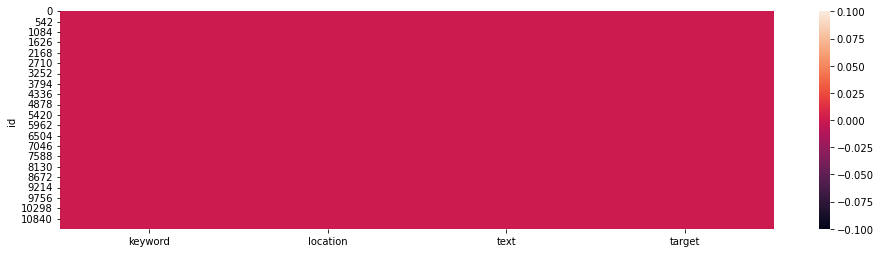

In [30]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [31]:
df.isnull().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

## Find out highly correlated features

In [32]:
# NA

## Find out correlation and perform visualization using heatmap

In [33]:
# NA

## Find out features which needs type casting

In [34]:
# Home work

# Text Data Cleaning

In [35]:
df.head(2)

,keyword,location,text,target
id,,,,
0,ablaze,United States,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,United States,Telangana: Section 144 has been imposed in Bha...,1


In [36]:
df.text[20]

"Cameroon's #BIR soldiers on the 05/01/2020 invaded the #SouthernCameroons Village of Kimar - So setting ablaze a total of…"

In [37]:
df.text[520]

'Had two dreams , one bad and the other good . I was a hero in the second dream 😁😁😁😁😁. Even rode a 6 legged mystic… https://t.co/nAe63CJfZS'

In [38]:
df.text[890]

"Now I can see that the VIC is back. The TL gets blazing🔥🔥🔥 when you're around. Happy 2020 to you #Leadership!"

In [39]:
df.text[1890]

'Burning up firee ~~ #ALABTopSpotONMYX #PUSHAwardsATIN #SB19atWMA2020'

## Write a function for text cleaning

In [55]:
def textCleaning(text):
    op = re.sub("https://[a-zA-Z0-9/\.]+"," ",text)
    op = re.sub("[^a-zA-Z0-9]+"," ",op)
    op = re.sub(r"\b\d+(th)?\b"," ",op)
    op = re.sub(r"\b[a-zA-Z0-90]\b"," ",op)
    op = re.sub("\s+"," ",op)
#     op = "".join([w for w in op if w not in STOPWORDS])
    return op
textCleaning(df.text[300])

'Russia Blames Trump Iran Strike on Impeachment For Trump the annihilation of an Iranian General presents decen '

In [56]:
df.text = df.text.map(textCleaning)

In [57]:
df.head(3)

,keyword,location,text,target
id,,,,
0,ablaze,United States,Communal violence in Bhainsa Telangana Stones ...,1
1,ablaze,United States,Telangana Section has been imposed in Bhainsa ...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership,1


# Infer insights of Data after All the above process are completed using Visualization

## Count of categorical data

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


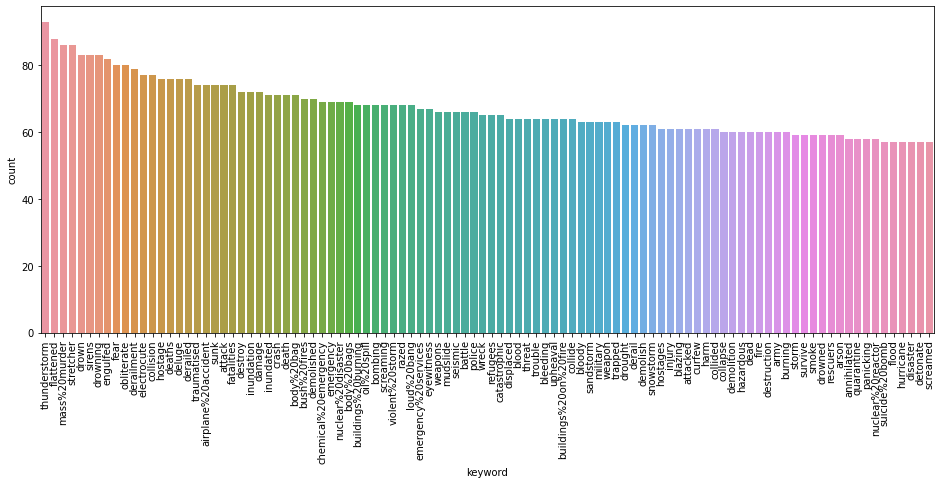

In [60]:
plt.figure(figsize=(16,6))
sns.countplot(df.keyword,order=df.keyword.value_counts().index[:100])
plt.xticks(rotation=90)
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


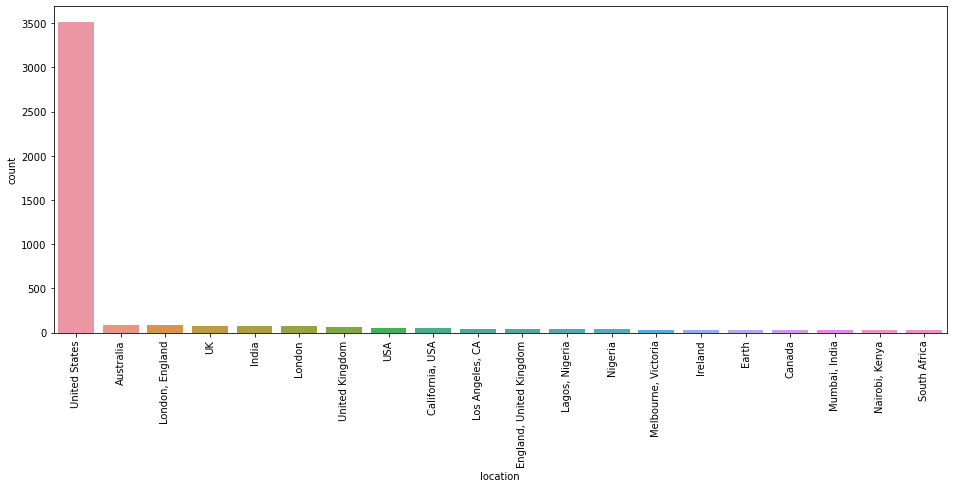

In [69]:
plt.figure(figsize=(16,6))
sns.countplot(df.location,order=df.location.value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

## Histogram for discrete data to understand central tendency of data

<AxesSubplot:xlabel='target', ylabel='Count'>

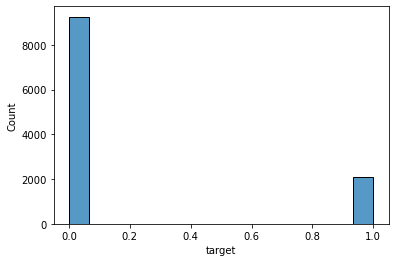

In [61]:
sns.histplot(df.target)

## Correlation between various features

In [62]:
# NA

## Trend of discrete or continious feature (if data available)

In [63]:
# NA

## KDE plot to see how data is spread

In [64]:
# NA

## Bi-variate plot

In [65]:
df.head(2)

,keyword,location,text,target
id,,,,
0,ablaze,United States,Communal violence in Bhainsa Telangana Stones ...,1
1,ablaze,United States,Telangana Section has been imposed in Bhainsa ...,1


/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


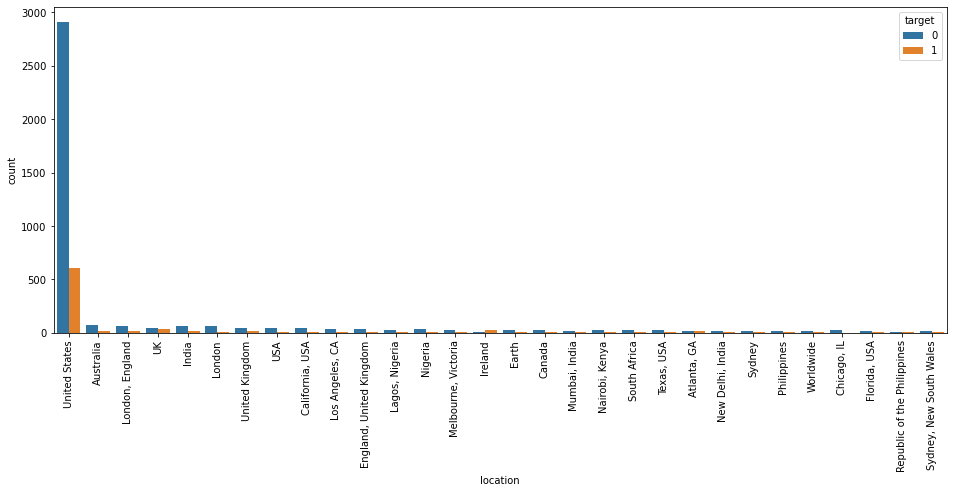

In [72]:
plt.figure(figsize=(16,6))
sns.countplot(df.location,order=df.location.value_counts().index[:30],hue=df.target)
plt.xticks(rotation=90)
plt.show()

## Text visualization using WordCloud

In [73]:
df.text

id
0        Communal violence in Bhainsa Telangana Stones ...
1        Telangana Section has been imposed in Bhainsa ...
2                 Arsonist sets cars ablaze at dealership 
3                 Arsonist sets cars ablaze at dealership 
4         Lord Jesus your love brings freedom and pardo...
                               ...                        
11365    Media should have warned us well in advance Th...
11366     feel directly attacked consider moonbin amp j...
11367     feel directly attacked consider moonbin amp j...
11368    ok who remember outcast nd the dora au THOSE A...
11369            Jake Corway wrecked while running at IRP 
Name: text, Length: 11370, dtype: object

### Disaster tweets

In [79]:
full_txt = " ".join(df.text[df.target == 1])
# full_txt

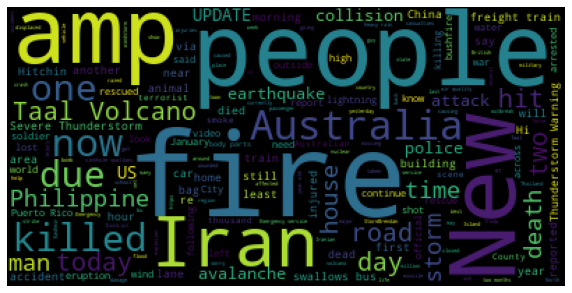

In [80]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

### Non-Disaster tweets

In [81]:
full_txt = " ".join(df.text[df.target == 0])
# full_txt

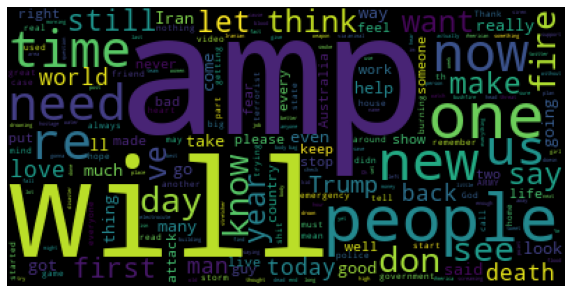

In [82]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

### Using Twitter Mask image for Disaster tweets

In [83]:
full_txt = " ".join(df.text[df.target == 1])
# full_txt

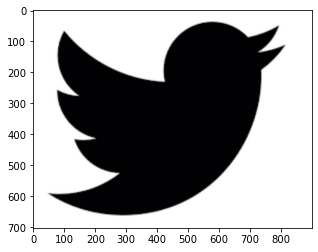

In [85]:
mask = plt.imread("twitter_mask.jpg")
plt.imshow(mask)
plt.show()

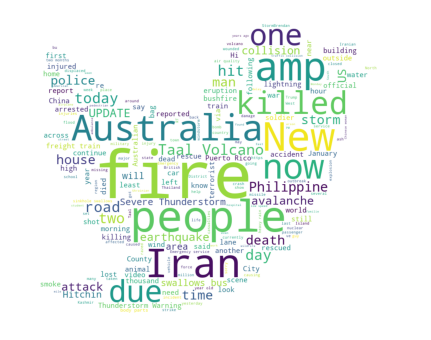

In [93]:
wc = WordCloud(mask=mask,background_color="white")
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

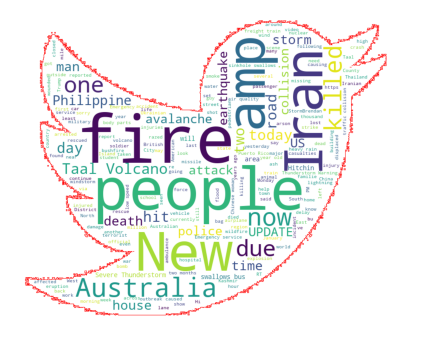

In [92]:
wc = WordCloud(mask=mask,background_color="white",contour_color="red",contour_width=.1)
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()